In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm


movie_df = pd.read_csv('output/Final_Data.csv')
movie_df.head()

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13


In [2]:
movie_df['ROI'] = (movie_df['Domestic_Gross']/ movie_df['Budget']) *100

movie_df.head()

,Title,Budget,Domestic_Gross,Year,Crit_Rating,Aud_Rating,Runtime_Min,Genre,MPAA_Rating,ROI
0,VARSITY BLUES,16000000,52894169,1999,41,76.0,104.0,Drama,R,330.588556
1,AT FIRST SIGHT,40000000,22365133,1999,32,46.0,128.0,"Drama, Romance",PG-13,55.912833
2,VIRUS,75000000,14010690,1999,10,21.0,100.0,"Action & Adventure, Horror, Science Fiction & ...",R,18.680920
3,IN DREAMS,30000000,12017369,1999,24,40.0,120.0,"Horror, Mystery & Suspense",R,40.057897
4,SHES ALL THAT,10000000,63465522,1999,40,55.0,95.0,"Comedy, Drama, Romance",PG-13,634.655220


In [78]:
movie_df.count()

Title             2371
Budget            2371
Domestic_Gross    2371
Year              2371
Crit_Rating       2371
Aud_Rating        2370
Runtime_Min       2336
Genre             2371
MPAA_Rating       2371
ROI               2371
dtype: int64

In [71]:
gb = movie_df.groupby(['Year',"MPAA_Rating"]).size()
count = pd.DataFrame(gb).reset_index()
count.rename(columns = {0:'Count'}, inplace = True)
count

# movie_df['Year'].value_counts()

,Year,MPAA_Rating,Count
0,1999,G,5
1,1999,PG,9
2,1999,PG-13,32
3,1999,R,59
4,2000,G,6
...,...,...,...
74,2017,R,37
75,2018,NR,1
76,2018,PG,15
77,2018,PG-13,46


    Year MPAA_Rating  Count
21  2004          NR      1
75  2018          NR      1


<Figure size 1440x576 with 0 Axes>

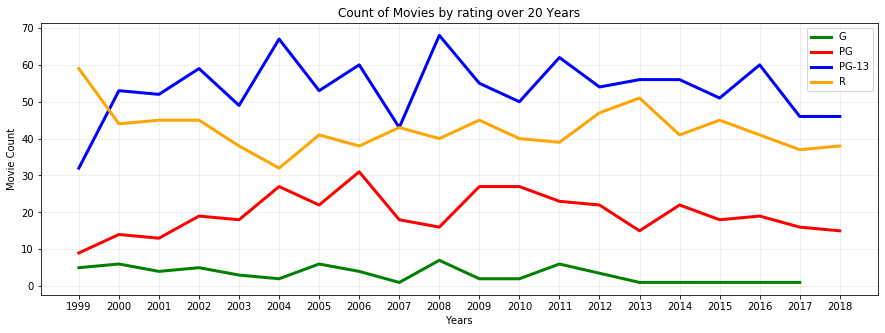

In [79]:
G = count[count['MPAA_Rating'] == 'G']
PG = count[count['MPAA_Rating'] == 'PG']
PG_13 = count[count['MPAA_Rating'] == 'PG-13']
R = count[count['MPAA_Rating'] == 'R']
NR = count[count['MPAA_Rating'] == 'NR']
print(NR)
plt.figure(figsize=(20,8))
x_axis = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 
     2006, 2007, 2008, 2009, 2010, 2011, 2012, 
     2013, 2014, 2015, 2016, 2017, 2018]

colors = cm.rainbow(np.linspace(0, 1, 20))
fig, ax = plt.subplots()

# Set the plot title and axes titles
plt.title("Count of Movies by rating over 20 Years")
plt.xlabel("Years")
plt.ylabel("Movie Count")

fig.set_size_inches(15, 5)
tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)

ax.plot(G['Year'], G['Count'], color='green', label="G", linewidth=3)
ax.plot(PG['Year'], PG['Count'], color='red', label="PG", linewidth=3)
ax.plot(PG_13['Year'], PG_13['Count'], color='blue', label="PG-13", linewidth=3)
ax.plot(R['Year'], R['Count'], color='orange', label="R", linewidth=3)
# ax.plot(NR['Year'], NR['Count'], color='purple', label="NR", linewidth=3, linestyle='dashed')
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)
ax.legend(loc=1)


In [7]:
movie_gb = movie_df.groupby(["Year", "MPAA_Rating"])['ROI'].mean()
print(movie_gb)

avg_roi_df = pd.DataFrame(movie_gb).reset_index()
avg_roi_df


Year  MPAA_Rating
1999  G              183.192692
      PG             159.262103
      PG-13          178.358823
      R              567.709519
2000  G              166.682893
                        ...    
2017  R              319.977996
2018  NR              98.027910
      PG             272.924818
      PG-13          242.971440
      R              252.714324
Name: ROI, Length: 79, dtype: float64


,Year,MPAA_Rating,ROI
0,1999,G,183.192692
1,1999,PG,159.262103
2,1999,PG-13,178.358823
3,1999,R,567.709519
4,2000,G,166.682893
...,...,...,...
74,2017,R,319.977996
75,2018,NR,98.027910
76,2018,PG,272.924818
77,2018,PG-13,242.971440


<Figure size 1440x576 with 0 Axes>

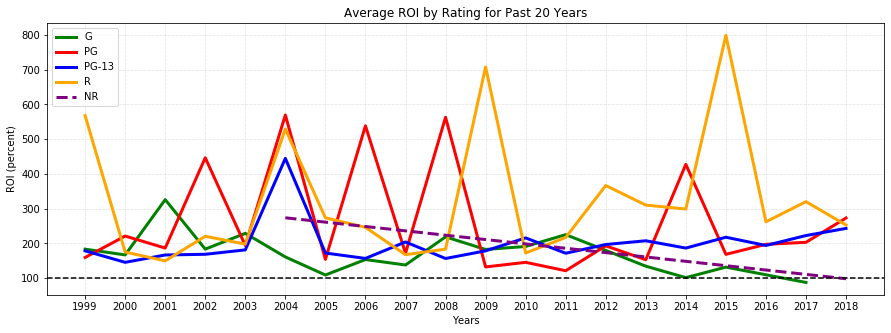

In [67]:
G = avg_roi_df[avg_roi_df['MPAA_Rating'] == 'G']
PG = avg_roi_df[avg_roi_df['MPAA_Rating'] == 'PG']
PG_13 = avg_roi_df[avg_roi_df['MPAA_Rating'] == 'PG-13']
R = avg_roi_df[avg_roi_df['MPAA_Rating'] == 'R']
NR = avg_roi_df[avg_roi_df['MPAA_Rating'] == 'NR']

plt.figure(figsize=(20,8))
x_axis = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 
     2006, 2007, 2008, 2009, 2010, 2011, 2012, 
     2013, 2014, 2015, 2016, 2017, 2018]
# plt.xticks(1999, 2018)

# plt.plot(G['Year'], G['ROI'], color='green')
# plt.plot(PG['Year'], PG['ROI'], color='red')
# plt.plot(PG_13['Year'], PG_13['ROI'], color='blue')
# plt.plot(R['Year'], R['ROI'], color='orange')
# plt.plot(NR['Year'], NR['ROI'], color='black')

colors = cm.rainbow(np.linspace(0, 1, 20))
fig, ax = plt.subplots()

# Set the plot title and axes titles
plt.title("Average ROI by Rating for Past 20 Years")
plt.xlabel("Years")
plt.ylabel("ROI (percent)")

fig.set_size_inches(15, 5)
tick_locations = [value for value in x_axis]
ax.set_xticks(tick_locations, minor=False)

ax.plot(G['Year'], G['ROI'], color='green', label="G", linewidth=3)
ax.plot(PG['Year'], PG['ROI'], color='red', label="PG", linewidth=3)
ax.plot(PG_13['Year'], PG_13['ROI'], color='blue', label="PG-13", linewidth=3)
ax.plot(R['Year'], R['ROI'], color='orange', label="R", linewidth=3)
ax.plot(NR['Year'], NR['ROI'], color='purple', label="NR", linewidth=3, linestyle='dashed')
ax.grid('on', which='major', axis='both', linestyle='dotted', linewidth=0.5)
ax.legend(loc=2)
plt.axhline(y=100, color='black', linestyle='--')

In [ ]:
# bins = [10000000, 15000000, 20000000, 30000000, 40000000, 50000000, 75000000, 100000000, 250000000, 500000000, 1000000000]

# group_names = ["<15M", "<20M", "<30M", "<40M", "<50M","<75M","<100M","<250M","<500M","<1B"]

# movie_df["Domestic_Cat"] = pd.cut(movie_df["Domestic_Gross"], bins, labels=group_names)
# movie_df.head()

# movie2 = movie_df.sort_values('Domestic_Cat')
# movie2.head()
# movie_groups = movie_df.groupby(movie_df['Year'])
# movie_groups
# movie_groups.head()

In [ ]:
df1999 = movie2[movie2['Year'] == 1999]
df1999

df2000 = movie2[movie2['Year'] == 2000]
df2000

plt.scatter(df1999['Domestic_Gross'], df1999['Crit_Rating'],  color="green", label="1999")
plt.scatter(df2000['Domestic_Gross'], df2000['Crit_Rating'],  color="red", label="2000")


plt.xlabel("Profit")
plt.ylabel("Ratings")

# colors = cm.rainbow(np.linspace(0, 1, 20))
# prev_year = 0

# for (idx, row) in movie_df.iterrows():
#     print(idx)
#     print(movie_df('Year'[idx]))
#     if prev_year == 'Year'[idx]:
#         color= next(colors)
#         prev_year = 'Year'[idx]
# plt.scatter(movie_df['Domestic_Cat'], movie_df['Crit_Rating']) #, color=next(colors))
# # plt.figure(figsize=(10,10))
# plt.xticks(rotation=90, ha="right")

In [23]:
# Split up our data into groups based upon 'gender'
test2 = pd.pivot_table(movie_df,index=["Year", "MPAA_Rating"], values = "ROI", aggfunc=[np.mean])


# Find out how many of each gender took bike trips
#rating_count = rating_groups['MPAA_Rating'].count()
test2


test2.reset_index(inplace=True)
test2
# test2['C'] = test2['Year'].astype(str) + test2['MPAA_Rating']
# test2

# # Split up our data into groups based upon 'gender'
# test3 = pd.pivot_table(movie_df,index=["Year", "MPAA_Rating"], values = "ROI", aggfunc=[np.sem])


# # Find out how many of each gender took bike trips
# #rating_count = rating_groups['MPAA_Rating'].count()
# test3
test2

,Year,MPAA_Rating,mean
,,,ROI
0,1999,G,183.192692
1,1999,PG,159.262103
2,1999,PG-13,178.358823
3,1999,R,567.709519
4,2000,G,166.682893
...,...,...,...
74,2017,R,319.977996
75,2018,NR,98.027910
76,2018,PG,272.924818


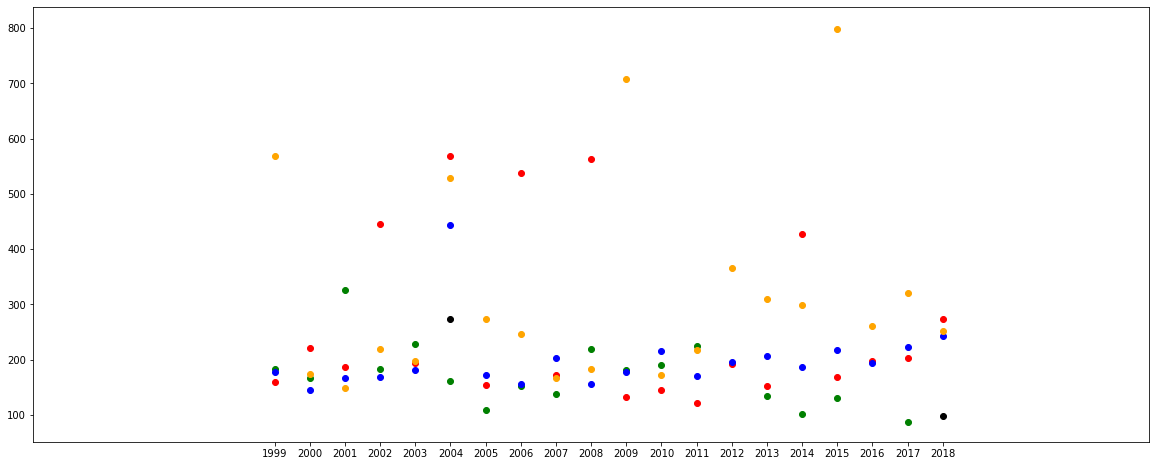

In [17]:
G = test2[test2['MPAA_Rating'] == 'G']
PG = test2[test2['MPAA_Rating'] == 'PG']
PG_13 = test2[test2['MPAA_Rating'] == 'PG-13']
R = test2[test2['MPAA_Rating'] == 'R']
NR = test2[test2['MPAA_Rating'] == 'NR']

df1999 = test2[test2['Year'] == 2000]
df1999

df2000 = test2[test2['Year'] == 2000]
df2000

# plt.scatter(df1999['Domestic_Gross'], df1999['Crit_Rating'],  color="green", label="1999")

# plt.plot(G['C'], G['mean']['ROI'], color='green')
# plt.plot(PG['C'], PG['mean']['ROI'], color='red')
plt.figure(figsize=(20,8))
x = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.scatter(G['Year'], G['mean']['ROI'], color='green')


plt.scatter(PG['Year'], PG['mean']['ROI'], color='red')
plt.scatter(PG_13['Year'], PG_13['mean']['ROI'], color='blue')
plt.scatter(R['Year'], R['mean']['ROI'], color='orange')
plt.scatter(NR['Year'], NR['mean']['ROI'], color='black')

In [148]:
rating_groups.head()

rating_groups = test2.T
rating_groups.head()

,,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
Year,,1999,1999,1999,1999,2000,2000,2000,2000,2001,2001,...,2016,2016,2017,2017,2017,2017,2018,2018,2018,2018
MPAA_Rating,,G,PG,PG-13,R,G,PG,PG-13,R,G,PG,...,PG-13,R,G,PG,PG-13,R,NR,PG,PG-13,R
mean,ROI,183.193,159.262,178.359,567.71,166.683,221.012,145.267,174.874,325.8,186.345,...,193.811,261.979,87.3721,202.933,222.425,319.978,98.0279,272.925,242.971,252.714
C,,1999G,1999PG,1999PG-13,1999R,2000G,2000PG,2000PG-13,2000R,2001G,2001PG,...,2016PG-13,2016R,2017G,2017PG,2017PG-13,2017R,2018NR,2018PG,2018PG-13,2018R


ValueError: setting an array element with a sequence.

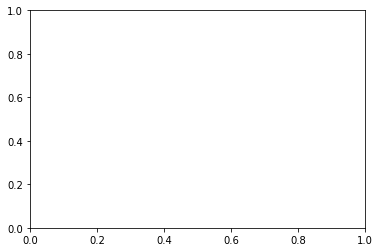

In [85]:
plt.scatter(rating_groups['ROI'], rating_groups['Crit_Rating'],  color="green")